# Data Wrangling  
## 1.1 Importing Data

In [2]:
 # Import libraries
import pandas as pd
import numpy as np
from numpy import nan as NA 
import random
from matplotlib import pyplot 
%matplotlib inline
print("imported all data")

imported all data


In [3]:
import os 
os. chdir("/Users/sobil/Documents/MSC/Sem 1/Database & Analytical Programming/Lab/Lab-9/Tutorial Data-20200326")

bodyFat = pd.read_csv("bodyfat.csv")
bodyFat.head()

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## 1.2 Dealing with Missing Values
We are going to introduce some NAs into the data:

In [4]:
bodyFatMissing = bodyFat.copy()

# random 20% index for NAs indexes
replaceIndexies = random.sample(range(0,252),50)
for item in replaceIndexies :
    bodyFatMissing.loc[item,"Abdomen"] = NA
print("added missing data")    

added missing data


Let us try replacing the missing items with the mean:

In [5]:
meanReplacement = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].mean())

Let us try replacing the missing items with the median:

In [6]:
medianReplacement = bodyFatMissing["Abdomen"].fillna(bodyFatMissing["Abdomen"].median())

We can plot histograms in order to see the effects of our imputation.
Original

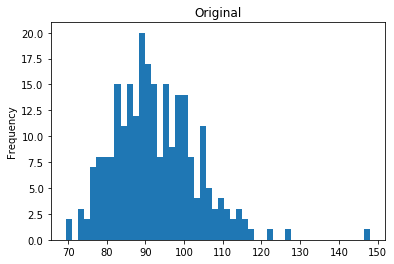

In [7]:
#Plot histogram
# original
bodyFat["Abdomen"].plot.hist(bins=50, title = "Original")

Mean

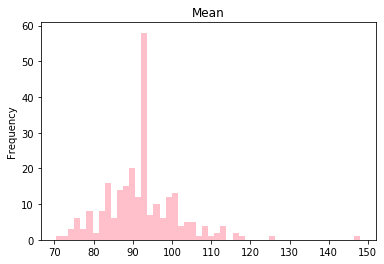

In [8]:
meanReplacement.plot.hist(bins = 50 , title = "Mean", color = "Pink")

Median

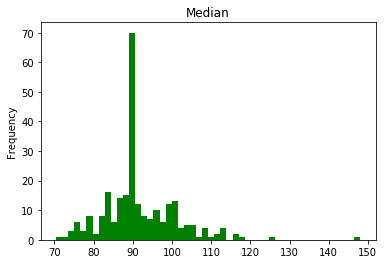

In [9]:
medianReplacement.plot.hist(bins=50, title = "Median", color = "Green")

Plot Histogram overlaid 

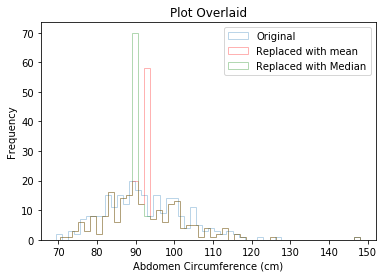

In [10]:
pyplot.hist(bodyFat["Abdomen"], bins=50, alpha=0.3, label="Original", histtype="step", stacked=True, fill=False)
pyplot.hist(meanReplacement, bins=50, color="red", alpha=0.3, label="Replaced with mean",histtype="step", stacked=True, fill=False) 
pyplot.hist(medianReplacement, bins=50, color="green", alpha=0.3,label="Replaced with Median",histtype="step", stacked=True, fill=False)
pyplot.legend(loc="upper right")
pyplot.xlabel("Abdomen Circumference (cm)")
pyplot.ylabel("Frequency")
pyplot.title("Plot Overlaid")
pyplot.show()

## 1.3 Discretisation & Binarisation
### 1.3.1 Discretisation

In [11]:
bins = [18,25,35,45,65,100]
group_labels = ["Youth", "YoungAdult", "Adult", "MiddelAge", "Senior"]
bodyFat["AgeGroups"] = pd.cut(bodyFat["Age"], bins, labels= group_labels)

### 1.3.2 Binarisation

In [24]:
bodyFat['Tall'] = bodyFat.apply (lambda row:  1 if row["Height"] > 72 else 0, axis=1)
bodyFat.head()

,id,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,AgeGroups,Tall
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Youth,0
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Youth,1
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Youth,0
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,YoungAdult,1
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Youth,0


writing new file

In [26]:
bodyFat.to_csv("bodyfat_new.csv")

##1.4 Merging Data

Import the three files: guitars.csv, guitarPayment.csv and retailers.csv

In [20]:
guitars = pd.read_csv("guitars.csv")
guitarPayment = pd.read_csv("guitarPayment.csv")
retailers = pd.read_csv("retailers.csv")
guitars.head()

,order_id,customer_id,brand,model,colour,use_type_id
0,47856,72,Paul Reed Smith,Custom 22,Black,3
1,47857,63,Fender,Stratocaster,Fire Engine Red,2
2,47858,60,Gibson,Les Paul Standard,Sunburst,1
3,47859,69,Ibanez,SA460QM-ABB,Antique Brown Burst,3
4,47860,33,Jackson,Dinky,Yellow,3


In [18]:
guitarPayment.head()

,cost_per_month,interest_rate_per_month,loyalty_points,order_id
0,185,2.77,1.85,47861
1,411,6.17,4.11,47862
2,420,6.30,4.20,47863
3,236,3.54,2.36,47864
4,115,1.72,1.15,47865


In [19]:
retailers.head()

,Retailer,Location,Customer,model
0,Andertons,Guildford,72,Custom 22
1,Wunjo Guitars,London,63,Stratocaster
2,Pro Musica,Cork,60,Les Paul Standard
3,Waltons,Blanchardstown,69,SA460QM-ABB
4,Music Minds,Dublin,33,Dinky


Merge ‘guitars’ and ‘guitarPayments’ on ‘order_id’ using an outer join. What do you notice?

In [30]:
mergedone = pd.merge(guitars, guitarPayment, on="order_id", how="outer")
mergedone.head()

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47856,72.0,Paul Reed Smith,Custom 22,Black,3.0,NaN,NaN,NaN
1,47857,63.0,Fender,Stratocaster,Fire Engine Red,2.0,NaN,NaN,NaN
2,47858,60.0,Gibson,Les Paul Standard,Sunburst,1.0,NaN,NaN,NaN
3,47859,69.0,Ibanez,SA460QM-ABB,Antique Brown Burst,3.0,NaN,NaN,NaN
4,47860,33.0,Jackson,Dinky,Yellow,3.0,NaN,NaN,NaN


Now try using an inner join. What’s the difference now?

In [29]:
mergedtwo = pd.merge(guitars, guitarPayment, on="order_id", how="inner")
mergedtwo.head()

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11
2,47863,25,Rickenbacker,Model 330 12,Blonde,2,420,6.30,4.20
3,47864,57,G&L,Fullerton,Yellow,1,236,3.54,2.36
4,47865,66,Charvel,Pro-Mod,Green,3,115,1.72,1.15


In [32]:
 mergedThree = pd.merge(mergedtwo, retailers, how='inner')
 mergedThree.head()
 

,order_id,customer_id,brand,model,colour,use_type_id,cost_per_month,interest_rate_per_month,loyalty_points,Retailer,Location,Customer
0,47861,76,Schecter,Hellraiser,Purple,1,185,2.77,1.85,X Music,Dublin,76
1,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Andertons,Guildford,32
2,47862,32,Epihone,Dot,Sunburst,1,411,6.17,4.11,Pro Musica,Cork,39
3,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Andertons,Guildford,32
4,47868,39,Epihone,Dot,Sunburst,3,347,5.21,3.47,Pro Musica,Cork,39


In [33]:
 mergedThree.shape

(24, 12)

In [34]:
 mergedThree = mergedThree.drop(columns = "Customer")
 mergedThree.shape
 

(24, 11)

In [35]:
 mergedThree.groupby("brand").agg({
        "cost_per_month": "mean",
        "interest_rate_per_month": "mean",
        "colour": pd.Series.mode
    })

,cost_per_month,interest_rate_per_month,colour
brand,,,
Charvel,115.000000,1.720000,Green
Epihone,379.000000,5.690000,Sunburst
Fender,246.571429,3.700000,"[Seafoam Green, Yellow]"
G&L,236.000000,3.540000,Yellow
Gibson,351.666667,5.273333,Teaburst
Ibanez,198.000000,2.970000,Antique Brown Burst
Jackson,234.000000,3.510000,Silverburst
Paul Reed Smith,293.500000,4.400000,"[Black Cherry, Blue]"
Rickenbacker,420.000000,6.300000,Blonde
